In [1]:
#The project's task is twofold.# 
    #1. determine the 100 best films made in the past 10 years#
    #2. determine the year in which the most 'good' films were made#

In [2]:
#We load the libraries necessary for work#

import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')

In [3]:
#We open the data file#

df = pd.read_csv('imdb_data_2023.csv')
pd.set_option("display.max_columns",df.shape[1])

In [4]:
df

,Unnamed: 0,Moive Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
0,0,Leave the World Behind,6.5,90000.0,67.0,"Drama, Mystery, Thriller",R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail
1,1,Wonka,7.4,24000.0,66.0,"Adventure, Comedy, Family",PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King
2,2,Poor Things,8.5,6700.0,86.0,"Comedy, Drama, Romance",R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos
3,3,Killers of the Flower Moon,7.8,128000.0,89.0,"Crime, Drama, History",R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese
4,4,May December,7.0,21000.0,85.0,"Comedy, Drama",R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes
...,...,...,...,...,...,...,...,...,...,...,...
1945,1945,"Definitely, Maybe",7.1,172000.0,59.0,"Comedy, Drama, Romance",PG-13,2008,1h 52m,"Ryan Reynolds, Rachel Weisz, Abigail Breslin, ...",Adam Brooks
1946,1946,The Fly,7.6,198000.0,79.0,"Drama, Horror, Sci-Fi",R,1986,1h 36m,"Jeff Goldblum, Geena Davis, John Getz, Joy Bou...",David Cronenberg
1947,1947,The Mighty Ducks,6.5,71000.0,46.0,"Comedy, Drama, Family",PG,1992,1h 44m,"Emilio Estevez, Joss Ackland, Lane Smith, Heid...",Stephen Herek
1948,1948,Little Giants,6.4,30000.0,NaN,NaN,PG,1994,1h 47m,NaN,NaN


In [5]:
#Brišemo kolone koje nam nisu potrebne#
#Raspoređujemo kolone po pogodnijem kriterijumu#

df.drop(columns=['Meta Score', 'PG Rating','Unnamed: 0'])
df = df[['Moive Name','Duration', 'Rating', 'Year','Genre','Cast', 'Director','Votes']]

In [6]:
#We put Serbian names instead of foreign ones#

nazivi_kolona = {'Moive Name':'Ime filma', 'Duration':'Trajanje','Rating':'Ocena','Year':'Godina','Genre':'Žanr','Cast':'Uloge',
                'Director':'Reditelj','Votes':'Glasalo'}
df = df.rename(columns=nazivi_kolona)

In [7]:
#We filter movies so that we only look at those that were made after 2013#
#We also filter films based on the criterion that the number of votes for their rating is greater than 75% of the average value of the total number of votes#
#We thereby eliminate films that have a low number of votes, as this may lead us to an irrelevant sample#

df = df.loc[df['Godina']>2013].loc[df['Glasalo'] > (0.75*( df['Glasalo'].mean()))].reset_index().drop(columns='index')

In [8]:
#Sortiramo tabelu po ocenama od najveće do najmanje#
#Kako nam je potrebno 100 najboljih filmova, biramo samo prvih 100 redova u tabeli#

df.sort_values('Ocena', ascending= False, inplace = True)
df = df.reset_index().drop(columns='index')
df = df.head(-151)
df

#Vidimo da je najbolji film Interstellar#
#To nam nije potrebno za projekat, ali je zanimljiv nus-podatak#

,Ime filma,Trajanje,Ocena,Godina,Žanr,Uloge,Reditelj,Glasalo
0,Interstellar,2h 49m,8.7,2014,"Adventure, Drama, Sci-Fi","Matthew McConaughey, Anne Hathaway, Jessica Ch...",Christopher Nolan,2000000.0
1,Spider-Man: Across the Spider-Verse,2h 20m,8.6,2023,"Animation, Action, Adventure","Shameik Moore, Hailee Steinfeld, Brian Tyree H...",Joaquim Dos SantosKemp PowersJustin K. Thompson,314000.0
2,Whiplash,1h 46m,8.5,2014,"Drama, Music","Miles Teller, J.K. Simmons, Melissa Benoist, P...",Damien Chazelle,953000.0
3,Oppenheimer,3h,8.4,2023,"Biography, Drama, History","Cillian Murphy, Emily Blunt, Matt Damon, Rober...",Christopher Nolan,553000.0
4,Spider-Man: Into the Spider-Verse,1h 57m,8.4,2018,"Animation, Action, Adventure","Shameik Moore, Jake Johnson, Hailee Steinfeld,...",Bob PersichettiPeter RamseyRodney Rothman,646000.0
...,...,...,...,...,...,...,...,...
95,The Nice Guys,1h 56m,7.4,2016,"Action, Comedy, Crime","Russell Crowe, Ryan Gosling, Angourie Rice, Ma...",Shane Black,361000.0
96,The Jungle Book,1h 46m,7.4,2016,"Animation, Action, Adventure","Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",Jon Favreau,289000.0
97,Predestination,1h 37m,7.4,2014,"Action, Drama, Sci-Fi","Ethan Hawke, Sarah Snook, Noah Taylor, Madelei...",Michael SpierigPeter Spierig,299000.0
98,Uncut Gems,2h 15m,7.4,2019,"Crime, Drama, Thriller","Adam Sandler, Julia Fox, Idina Menzel, Mesfin ...",Benny SafdieJosh Safdie,309000.0


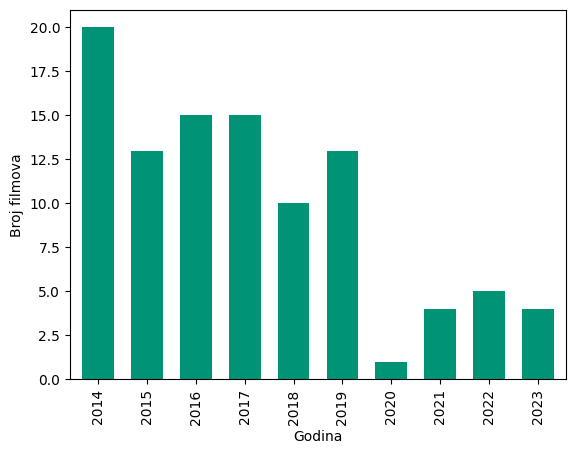

In [9]:
#Predstavljamo odnos broja snimljenih filmova i godine u kojima su snimljeni#

df['Godina'].value_counts().sort_index().plot(kind = 'bar', width = 0.65, ylabel = 'Broj filmova', color = '#009376')
plt.show()

#Primećujemo da je u 2014. godini snimljen daleko najveći broj dobrih filmova#

In [10]:
###~~~BITNO~~~###

#Uočavamo da je u 2020. godini snimljeno daleko manje 'dobrih' filmova u odnosu na sve prethodne godine#
#U sledećem koraku bi trebalo videti ukupan broj snimljenih filmova u 2020#
#Ako je i on manji od nekog očekivanog broja, onda treba tragati za razlogom zašto je to tako# 
#Kako je 2020 godina bila godina pandemije Korona virusa, razlog MO\DA možemo videti u tome#

#Takođe, broj snimljenih filmova u narednim godinama (2021, 2022, 2023) je manji nego pre 2020#
#Treba se pitati šta je uzrok tome#
#Jedan od razloga bi bila lošija ekonomska situacija u svetu#